### Short introduction to Gradient descent.

<br />
In this coding example we explain how gradient descent would work for a single layer preceptron with linear output.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
import math

In [11]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchviz import make_dot

device = 'cuda' if torch.cuda.is_available() else 'cpu'

### Links
<br />
https://www.youtube.com/watch?v=sDv4f4s2SB8
<br />
https://www.youtube.com/watch?v=DjF3GiCazwc&list=LLkGG_GT2lhbfvl5e9bZpJ8g&index=2&t=0s
<br / >
https://towardsdatascience.com/understanding-pytorch-with-an-example-a-step-by-step-tutorial-81fc5f8c4e8e

### Case 1, Using the aglortihm to solve for a single parameter.
<br />
For a line fitting task, we are provided with one of the parameters "m" which is used scale the line being fit. Using the optimization technique of gradient descent we will find the bias term needed to fit the curve.

### Given the data, X & Y

In [3]:
X = np.array([0.5,2.3,2.9])
Y = np.array([1.4,1.9,3.2])

### Using pre-calculated slope m = 0.64

The fit line with bias term set at 0, results in model with high Sum of squared error.
<br/>
$$Y = mx + b$$
<br/>
$$SSE = \sum(Y - \hat{Y})^2 = \sum(Y - mx) \ \ \text{Given b = 0}$$
<br/>
$$SSE = 3.15$$

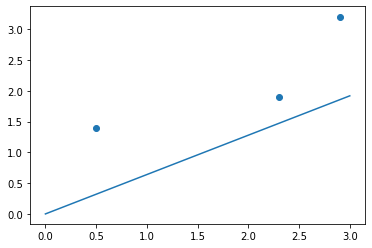

In [4]:
plt.scatter(X,Y)
W = 0.64
plt.plot(range(math.ceil(np.max(X))+1),[W*i for i in range(math.ceil(np.max(X))+1)])
plt.show()

We will use gradient descent to find the parameter 'm' for the optimum value that minimizes SSE our cost function.

(-1, 10)

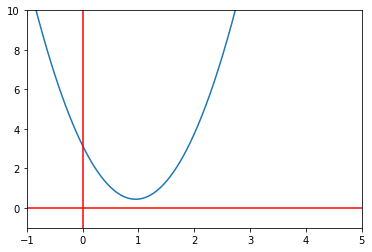

In [5]:
def ss_loss_1(B):
    #Using the X&Y decalred at the top
    return np.sum(((Y - (W*X + B)))**2)

plt.plot([p/1000 for p in range(-10000,10000)],[ss_loss_1(i) for i in [p/1000 for p in range(-10000,10000)]])
plt.axvline(x = 0, c = 'r')
plt.axhline(y = 0, c = 'r')
plt.xlim([-1,5])
plt.ylim([-1,10])

Looking at the curve for SSE vs different alphas, it can be seen that the optimum value of $\alpha$ should be around 1, which minimizes SSE.

$$ loss = \sum(Y - \hat{Y})^ 2 $$
<br />
$$m = 0.64$$
<br />
$$\hat{y} = b + mx$$
<br />
$$SSE = \sum (y_i - (b + mx_i))^2$$
<br />
$$ SSE = (1.4 - (b + 0.32))^2 + (1.9 - (b + 1.4))^2 + (3.2 - (b + 1.8))^2 $$
<br />
$$SSE = f(x_1) + f(x_2) + f(x_3) $$
<br />
<br />
The derivative of SSE will give us an indicator of minimum, as when d/db SSE =0; we will get optimum alpha value
<br />
<br />
$$ \frac{d}{db} \ SSE = f'(x_1) + f'(x_2) + f'(x_3) $$
<br />
$$-2(-b + 1.08) - 2(-b + 0.42) - 2(-b  + 1.3)$$
<br />
$$\frac{d}{db} \ SSE = 6b - 5.7$$
<br />
$$slope(b) = \frac{d}{db} \ SSE = 6b - 5.7$$

### High level overview of gradient descent.
<br />
Given a random starting point in our cost curve (SEE), we use the derivative along with a learning rate C to understand which direction to move. An example is shown below.

### Lets initialize gradient descent at  $b  = 0$
<br />
$$Slope(0) = -5.7$$
<br />
$$Step \ Size(b) = Slope(b) \times C$$
<br />
$$Let \ C = 0.1$$
<br />
$$Step \ Size(Slope(0)) = -5.7 \times 0.1 = -0.57$$
<br />
$$b_{new} = 0 - Step \ Size(Slope(0)) $$
<br />
$$ b_{new} = 0 + 0.57 = 0.57$$
<br />
$$slope(0.57) = -2.3$$
<br />
$$\text{We move closer to 0}$$
<br />
$$sse(0.57) = 1$$
<br />

### From the previous iteration  $b  = 0.57$
<br />
$$Slope(0.57) = -2.3$$
<br />
$$Step Size(Slope(0)) = -2.3 \times 0.1 = -0.23$$
<br />
$$b_{new} = 0.57 - Step Size(Slope(0.57)) = 0 + 0.23 = 0.8, slope(0.8) = -0.9$$
<br />
$$sse(0.8) = 0.5$$

In [48]:
# Our data was in Numpy arrays, but we need to transform them into PyTorch's Tensors
# and then we send them to the chosen device
x_train_tensor = torch.from_numpy(X).float().to(device)
y_train_tensor = torch.from_numpy(Y).float().to(device)

In [49]:
# FIRST Initializes parameters "m" and "b", ALMOST as we did in Numpy
# since we want to apply gradient descent on these parameters, we need to set REQUIRES_GRAD = TRUE
# So in this case it is only for variable b
m = torch.tensor(0.64,dtype=torch.float).to(device)
b = torch.tensor(0.0, dtype=torch.float).to(device)
m.requires_grad_(requires_grad=False)
b.requires_grad_()
print (m,b)

tensor(0.6400) tensor(0., requires_grad=True)


In [50]:
lr = 0.1
n_epochs = 1

for epoch in range(n_epochs):
    y_hat = m*x_train_tensor+b
    error = (y_train_tensor - y_hat)**2
    loss = error.sum()
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    # Let's check the computed gradients...
    print(b.grad)       
    
    # We need to use NO_GRAD to keep the update out of the gradient computation
    # Why is that? It boils down to the DYNAMIC GRAPH that PyTorch uses...
    with torch.no_grad():
        print("The update value for b ",lr * b.grad)
        b -= lr * b.grad
    
    # PyTorch is "clingy" to its computed gradients, we need to tell it to let it go...
    b.grad.zero_()

tensor(-5.7040)
The update value for b  tensor(-0.5704)


### The values of m,c after a single iteration of gradient descent.

In [51]:
print (" Slope = ",m," Intercept = ",b)

 Slope =  tensor(0.6400)  Intercept =  tensor(0.5704, requires_grad=True)


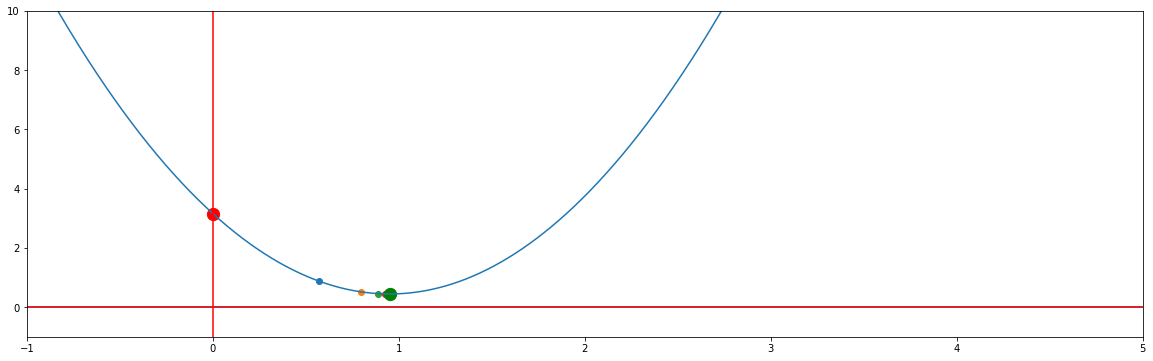

In [61]:
f,ax = plt.subplots(figsize = (20,6))
plt.plot([p/1000 for p in range(-10000,10000)],[ss_loss_1(i) for i in [p/1000 for p in range(-10000,10000)]])
plt.axhline(y=0)

m = torch.tensor(0.64,dtype=torch.float).to(device)
b = torch.tensor(0.0, dtype=torch.float).to(device)
m.requires_grad_(requires_grad=False)
b.requires_grad_()


lr = 0.1
optimizer = optim.SGD([b], lr=lr)

for epoch in range(10):
    y_hat = m*x_train_tensor+b
    error = (y_train_tensor - y_hat)**2
    loss = error.sum()
    
    if epoch == 0:
        plt.scatter(b.detach().numpy(), loss.detach().numpy(),c = 'r', s = 150)
    else:
        plt.scatter(b.detach().numpy(), loss.detach().numpy())
    
    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    
    # No more manual update!
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    optimizer.zero_grad()
    


plt.scatter(b.detach().numpy(), loss.detach().numpy(),c = 'g', s = 150)    
plt.axvline(x = 0, c = 'r')
plt.axhline(y = 0, c = 'r')
plt.xlim([-1,5])
plt.ylim([-1,10])
plt.show()
#print ("Converged Value ",intercept)

After initializing at m = 0, new alphas move closer and closer to the optimum.

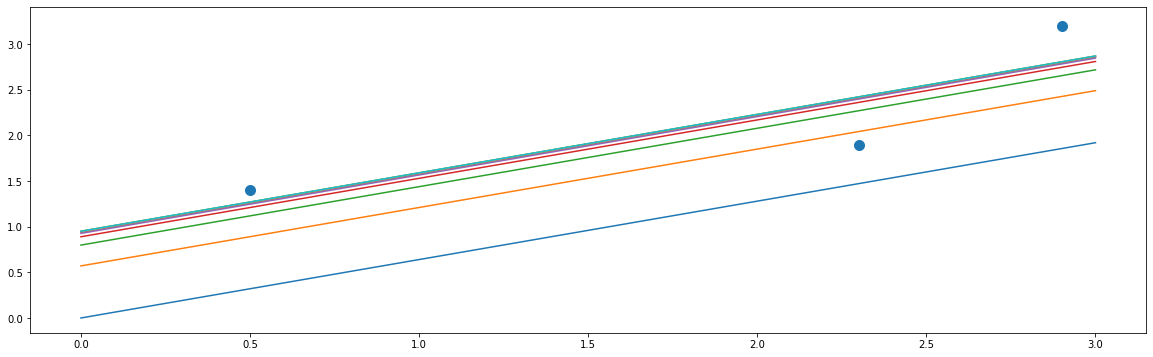

In [65]:
f,ax = plt.subplots(figsize = (20,6))

        
m = torch.tensor(0.64,dtype=torch.float).to(device)
b = torch.tensor(0.0, dtype=torch.float).to(device)
m.requires_grad_(requires_grad=False)
b.requires_grad_()


lr = 0.1
optimizer = optim.SGD([b], lr=lr)

for epoch in range(10):
    y_hat = m*x_train_tensor+b
    error = (y_train_tensor - y_hat)**2
    loss = error.sum()
    
    slope,intercept = m.detach().numpy(), b.detach().numpy()
    plt.plot(range(4),[slope*i + intercept for i in range(4)])
    

    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    
    # No more manual update!
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    optimizer.zero_grad()

plt.scatter(X,Y,s = 100)
plt.show()

### Case 2, Gradient Descent to find both parameters
<br />
Lets use gradient descent to find both parameters alpha and w. Refer to the video links above to understand the calculations behind the equation.

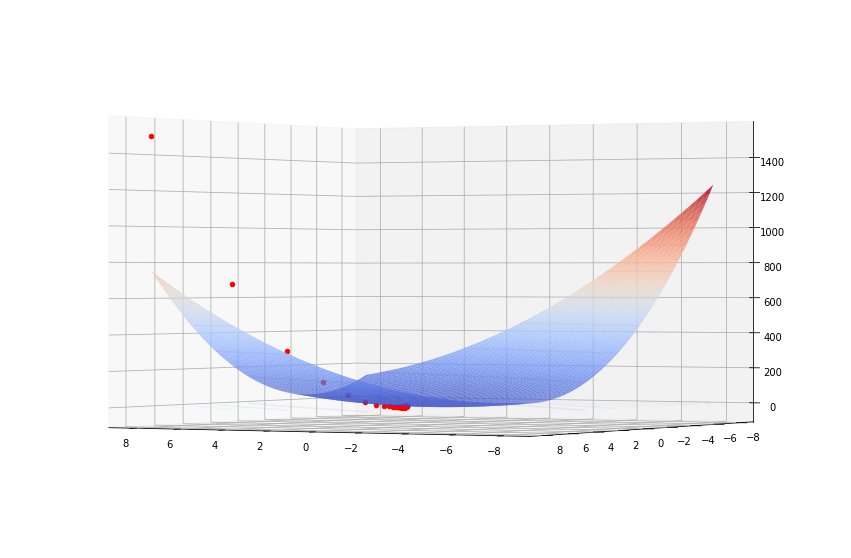

In [68]:
from mpl_toolkits.mplot3d import axes3d

def viz_loss(x1,x2):
    return (1.4 - (x1  + x2*0.32))**2 + (1.9 - (x1  + x2*1.4))**2 + (3.2 - (x1  + x2*1.8))**2 

a1 = np.linspace(-8, 8)
a2 = np.linspace(-8, 8)
A1, A2 = np.meshgrid(a1, a2)
Z = viz_loss(A1, A2)

fig = plt.figure(figsize = (15,10))
ax = fig.add_subplot(111, projection="3d")

m = torch.tensor(8.,dtype=torch.float).to(device)
b = torch.tensor(8., dtype=torch.float).to(device)
m.requires_grad_()
b.requires_grad_()
lr = 0.01
optimizer = optim.SGD([m,b], lr=lr)
        
for epoch in range(100):
    y_hat = m*x_train_tensor+b
    error = (y_train_tensor - y_hat)**2
    loss = error.sum()
    
    slope,intercept,SumSq = m.detach().numpy(), b.detach().numpy(),loss.detach().numpy()
    ax.scatter(slope,intercept,SumSq, c = 'red')
    

    # We just tell PyTorch to work its way BACKWARDS from the specified loss!
    loss.backward()
    
    # No more manual update!
    optimizer.step()
    
    # No more telling PyTorch to let gradients go!
    optimizer.zero_grad()


ax.plot_surface(A1, A2, Z, lw=10,cmap="coolwarm", rstride=1, cstride=1, alpha = 0.8)
ax.contour(A1, A2, Z, 10, cmap="coolwarm",linestyles="solid", offset=-1, alpha = 0.1)
ax.contour(A1, A2, Z, 10, colors="k", linestyles="solid", alpha = 0.1)
 
    
ax.view_init(0, 120)    
plt.show()

Above we see that when looking at more than a single factor, the SSE curve we are working with changes into a countour, or surface, similar to a mountaneous terrain. Gradient descent is able to find the minimum of this terratin while using more multiple variables.